## Data Analysis 

## Data

World Value Survey (2017-2022)

Country: Japan

Year: 2019


In [101]:
import pandas as pd
import numpy as np

In [102]:
data = pd.read_excel("C:/Users/ЛИЗА/Documents/F00010889-WVS_Wave_7_Japan_ExcelTxt_v2.0.xlsx")
data.head()

C:\ProgramData\Anaconda3\envs\text_m\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,version: Version of Data File,doi: Digital Object Identifier,B_COUNTRY: ISO 3166-1 numeric country code,B_COUNTRY_ALPHA: ISO 3166-1 alpha-3 country code,C_COW_NUM: CoW country code numeric,C_COW_ALPHA: CoW country code alpha,A_YEAR: Year of survey,D_INTERVIEW: Interview ID,J_INTDATE: Date of interview,FW_END: Year/month of end-fieldwork,...,WEIGHT4A: Overall Secular Values-4: Weight 4a,WEIGHT4B: Emancipative Values-4: Weight 4b,RESEMAVALBWGT: Weight for Emancipative values,RESEMAVALWGT: Weight for Emancipative values,SECVALBWGT: Weight for overall secular values Short Version,Y001_1: Materialist/postmaterialist 12-item index: Component 1,Y001_2: Materialist/postmaterialist 12-item index: Component 2,Y001_3: Materialist/postmaterialist 12-item index: Component 3,Y001_4: Materialist/postmaterialist 12-item index: Component 4,Y001_5: Materialist/postmaterialist 12-item index: Component 5
0,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,Japan,JPN,Japan,JPN,2019,Japan,2019 September,Jan 2017 to Dec 2021,...,Complete,Complete,0-1,0-1,0-1,1,1,1,0,1
1,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,Japan,JPN,Japan,JPN,2019,Japan,2019 September,Jan 2017 to Dec 2021,...,Complete,Complete,0-1,0-1,0-1,1,1,0,1,1
2,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,Japan,JPN,Japan,JPN,2019,Japan,2019 September,Jan 2017 to Dec 2021,...,Complete,Complete,0-1,0-1,0-1,0,0,1,0,1
3,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,Japan,JPN,Japan,JPN,2019,Japan,2019 September,Jan 2017 to Dec 2021,...,Complete,Complete,0-1,0-1,0-1,1,1,1,0,1
4,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,Japan,JPN,Japan,JPN,2019,Japan,2019 September,Jan 2017 to Dec 2021,...,Complete,Incomplete,0-1,0-1,0-1,-2,-2,-2,-2,-2


In [103]:
print(data.shape)

(1353, 397)


### Impotring excel data. By the shape, we can see that we have 397 columns - variables - and 1353 rows - cases. But we do not need all of them

## (1) Data Preparation

I selected some questions which I treat as suitable here. Let's start by looking at what types of answers we can get to these questions, how diverse the data is.

In [104]:
data['Q46: Feeling of happiness'].value_counts()

Quite happy         790
Very happy          405
Not very happy      120
Don´t know           26
Not at all happy      9
No answer             3
Name: Q46: Feeling of happiness, dtype: int64

In [105]:
data['Q49: Satisfaction with your life'].value_counts()

8                          347
7                          304
6                          157
5                          150
9                          131
4                           76
Completely satisfied        67
3                           60
2                           23
Completely dissatisfied     15
No answer                   15
Don´t know                   8
Name: Q49: Satisfaction with your life, dtype: int64

In [106]:
data['Q131: Secure in neighborhood'].value_counts()

Quite secure         753
Not very secure      476
Not at all secure     62
Very Secure           39
Don´t know            16
No answer              7
Name: Q131: Secure in neighborhood, dtype: int64

In [107]:
data['Q47: State of health (subjective)'].value_counts()

Good          506
Fair          488
Very good     187
Poor          145
Very poor      15
Don´t know     10
No answer       2
Name: Q47: State of health (subjective), dtype: int64

In [108]:
data['Q94: Active/Inactive membership: church or religious org'].value_counts()

Don't belong       1179
Inactive member     109
Active member        48
No answer            17
Name: Q94: Active/Inactive membership: church or religious org, dtype: int64

In [109]:
data['Q206: Information source: Internet'].value_counts()

Daily                804
Never                301
Weekly               155
Less than monthly     34
Monthly               33
No answer             26
Name: Q206: Information source: Internet, dtype: int64

In [110]:
data['Q273: Marital status'].value_counts()

Married                       980
Single                        173
Widowed                       100
Divorced                       68
Living together as married     14
No answer                      13
Separated                       5
Name: Q273: Marital status, dtype: int64

In [111]:
data['Q274: How many children do you have'].value_counts()

2 children                                    594
No children                                   255
3 children                                    251
1 child                                       190
4 children                                     38
Other missing; Multiple answers Mail (EVS)     19
5 children                                      3
6 children                                      2
7 or more children                              1
Name: Q274: How many children do you have, dtype: int64

In [112]:
data['Q260: Sex'].value_counts()

Female    763
Male      590
Name: Q260: Sex, dtype: int64

In [113]:
data['Q149: Freedom and Equality - Which more important'].value_counts()

Freedom       772
Equality      462
Don´t know    115
No answer       4
Name: Q149: Freedom and Equality - Which more important, dtype: int64

Now I am dropping all the variables I do not need and renaming my variables for better readability.

In [114]:
data = data[['Q46: Feeling of happiness', 'Q49: Satisfaction with your life', 'Q131: Secure in neighborhood', 'Q47: State of health (subjective)', 'Q94: Active/Inactive membership: church or religious org', 'Q206: Information source: Internet', 'Q273: Marital status', 'Q274: How many children do you have', 'Q260: Sex', 'Q149: Freedom and Equality - Which more important']]
data.rename(columns = {'Q46: Feeling of happiness': 'happiness', 'Q49: Satisfaction with your life': 'satisfaction', 'Q131: Secure in neighborhood': 'security_neighborhood', 'Q47: State of health (subjective)': 'health', 'Q94: Active/Inactive membership: church or religious org': 'church_member', 'Q206: Information source: Internet': 'internet_source', 'Q273: Marital status': 'marital_status', 'Q274: How many children do you have': 'children_num', 'Q260: Sex': 'sex', 'Q149: Freedom and Equality - Which more important': 'freedom_equality'}, inplace=True)
data.head()

,happiness,satisfaction,security_neighborhood,health,church_member,internet_source,marital_status,children_num,sex,freedom_equality
0,Quite happy,7,Not very secure,Good,Don't belong,Daily,Married,2 children,Male,Freedom
1,Quite happy,8,Quite secure,Good,Don't belong,Never,Married,3 children,Male,Equality
2,Quite happy,7,Not very secure,Good,Inactive member,Daily,Married,3 children,Male,Freedom
3,Not at all happy,Completely dissatisfied,Not at all secure,Poor,Don't belong,No answer,Widowed,2 children,Female,Freedom
4,Very happy,9,Not at all secure,Good,Don't belong,Daily,Married,2 children,Female,Don´t know


Above we saw that in some cases people tend to answer **'Don't know'** or no response at all **'No answer'** or **'Other missing; Multiple answers Mail (EVS)'**. Given that we cannot classify these answers into any category, and also that there are few answers given relative to the total number of cases, I will treat such answers as missings. Here I replace these answers with NA.

In [115]:
cols = ['happiness', 'satisfaction', 'security_neighborhood', 'health', 'church_member', 'internet_source', 'marital_status', 'children_num', 'sex', 'freedom_equality']
data[cols] = data[cols].replace({'Don´t know':np.nan, 'No answer':np.nan, 'Other missing; Multiple answers Mail (EVS)':np.nan})

Now let's look ow many nas we have in our data.

In [116]:
data.isnull().sum()

happiness                 29
satisfaction              23
security_neighborhood     23
health                    12
church_member             17
internet_source           26
marital_status            13
children_num              19
sex                        0
freedom_equality         119
dtype: int64

data_h = data[['happiness', 'security_neighborhood', 'health', 'church_member', 'internet_source', 'marital_status', 'children_num', 'sex', 'freedom_equality']]
data_h = data_h.dropna()
data_h

Not too large numbers. The largest number of lost data falls on the **freedom_equality** variable.

I decided to make satisfaction as an output variable, because questions Are you satisfied with life now? and Are you happy now? are quite different; people most likely perceive them in diverse ways. When we ask about happiness, people are, probably, subject to some kind of bias, where they evaluate more emotions at the current moment and tend to anwer more positively. The life satisfaction question is more about some sort of rational calculation, so I expect the variables I've chosen to fit life satisfaction better. 

So let's save our data as **data_s** and drop all our nas.

We had 1353 cases and now we left with only **1142 cases and 9 columns**.

In [117]:
data_s = data[['satisfaction', 'security_neighborhood', 'health', 'church_member', 'internet_source', 'marital_status', 'children_num', 'sex', 'freedom_equality']]
data_s = data_s.dropna()
data_s

,satisfaction,security_neighborhood,health,church_member,internet_source,marital_status,children_num,sex,freedom_equality
0,7,Not very secure,Good,Don't belong,Daily,Married,2 children,Male,Freedom
1,8,Quite secure,Good,Don't belong,Never,Married,3 children,Male,Equality
2,7,Not very secure,Good,Inactive member,Daily,Married,3 children,Male,Freedom
5,5,Not at all secure,Good,Don't belong,Never,Married,3 children,Female,Freedom
6,6,Quite secure,Fair,Don't belong,Never,Married,2 children,Female,Freedom
...,...,...,...,...,...,...,...,...,...
1348,9,Not very secure,Good,Inactive member,Daily,Married,3 children,Female,Equality
1349,8,Quite secure,Fair,Inactive member,Daily,Married,2 children,Male,Freedom
1350,8,Quite secure,Poor,Don't belong,Daily,Married,2 children,Male,Freedom
1351,8,Quite secure,Good,Don't belong,Daily,Married,2 children,Male,Equality


I will do logistic regression, so my outcome variable **satisfaction** should be binary. Firstly, I recoded it completely to numbers (10-scale), then I divided the variable in half: responses from 1 to 5 reflect the spectrum with low life satisfaction, I coded them as 0, responses from 6 to 10 are high levels of satisfaction with life, coded as 1. 

Also it was necessary to recode the variable about **the number of children**: all categories were converted to numbers, and the type of the variable was changed to numeric.

In [118]:
data_s['satisfaction'].mask(data_s['satisfaction'] == 'Completely satisfied', '10', inplace=True)
data_s['satisfaction'].mask(data_s['satisfaction'] == 'Completely dissatisfied', '1', inplace=True)
data_s["satisfaction"] = data_s["satisfaction"].astype(str).astype(int)
data_s["satisfaction"] = np.where(data_s["satisfaction"] <= 5, '0', '1')
data_s['children_num'] = np.where((data_s.children_num == 'No children'), 0, data_s.children_num)
data_s['children_num'] = np.where((data_s.children_num == '1 child'), 1, data_s.children_num)
data_s['children_num'] = np.where((data_s.children_num == '2 children'), 2, data_s.children_num)
data_s['children_num'] = np.where((data_s.children_num == '3 children'), 3, data_s.children_num)
data_s['children_num'] = np.where((data_s.children_num == '4 children'), 4, data_s.children_num)
data_s['children_num'] = np.where((data_s.children_num == '5 children'), 5, data_s.children_num)
data_s['children_num'] = np.where((data_s.children_num == '6 children'), 6, data_s.children_num)
data_s['children_num'] = np.where((data_s.children_num == '7 or more children'), 7, data_s.children_num)
data_s['children_num'] = data_s['children_num'].astype(int)
data_s.dtypes

satisfaction             object
security_neighborhood    object
health                   object
church_member            object
internet_source          object
marital_status           object
children_num              int32
sex                      object
freedom_equality         object
dtype: object

Now let's look at distributions, frequencies and plots of our variables. 

Again, they are 9, the number of cases are 1142.

In [119]:
print(data_s.shape)
data_s.describe()

(1142, 9)


,children_num
count,1142.000000
mean,1.744308
std,1.100290
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,7.000000


In [120]:
data_s['children_num'].value_counts()

2    514
0    216
3    211
1    161
4     34
5      3
6      2
7      1
Name: children_num, dtype: int64

<AxesSubplot:>

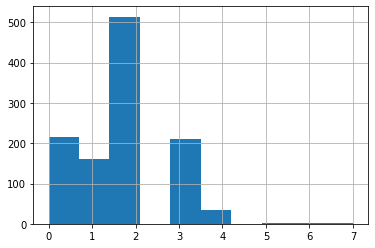

In [121]:
data_s['children_num'].hist()

Our single numeric variable is **the number of children**. 

Q274- Have you had children? If yes, how many?

From the table with properties of distribution we can see that it ranges from 0 to 7 with the mean of 1.74 and standard deviation of 1.1. By the histogram, we can confirm that the distribution of the variable is far from normal, take a look at the long right tail. 

In [122]:
data_s['satisfaction'].value_counts()

1    880
0    262
Name: satisfaction, dtype: int64

<AxesSubplot:>

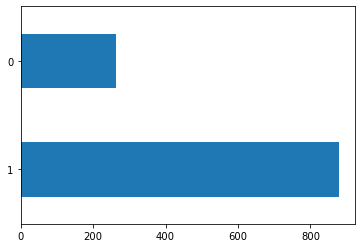

In [123]:
data_s['satisfaction'].value_counts().plot(kind='barh')

In [124]:
data_s['security_neighborhood'].value_counts()

Quite secure         655
Not very secure      406
Not at all secure     47
Very Secure           34
Name: security_neighborhood, dtype: int64

<AxesSubplot:>

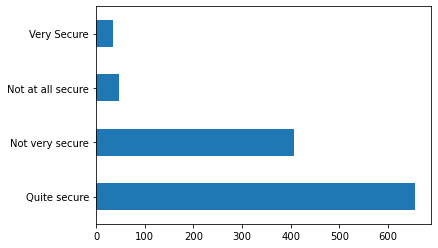

In [125]:
data_s['security_neighborhood'].value_counts().plot(kind='barh')

In [126]:
data_s['health'].value_counts()

Good         439
Fair         411
Very good    159
Poor         120
Very poor     13
Name: health, dtype: int64

<AxesSubplot:>

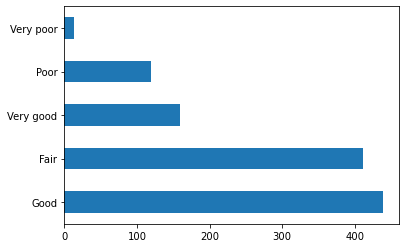

In [127]:
data_s['health'].value_counts().plot(kind='barh')

In [128]:
data_s['church_member'].value_counts()

Don't belong       1008
Inactive member      96
Active member        38
Name: church_member, dtype: int64

<AxesSubplot:>

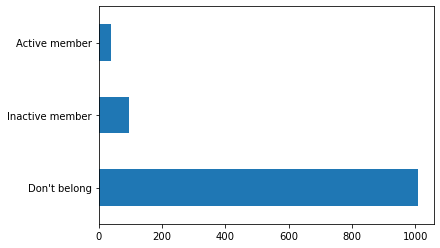

In [129]:
data_s['church_member'].value_counts().plot(kind='barh')

In [130]:
data_s['internet_source'].value_counts()

Daily                705
Never                245
Weekly               136
Monthly               29
Less than monthly     27
Name: internet_source, dtype: int64

<AxesSubplot:>

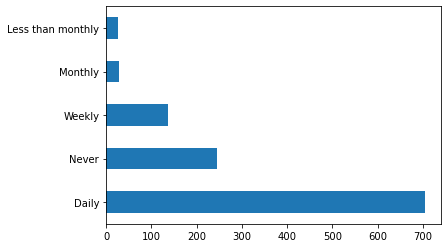

In [131]:
data_s['internet_source'].value_counts().plot(kind='barh')

In [132]:
data_s['marital_status'].value_counts()

Married                       850
Single                        138
Widowed                        78
Divorced                       60
Living together as married     11
Separated                       5
Name: marital_status, dtype: int64

<AxesSubplot:>

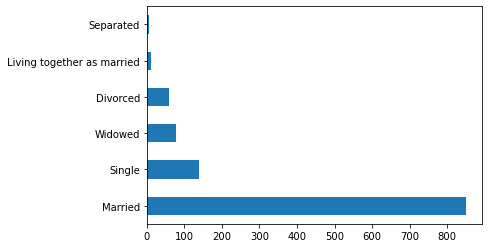

In [133]:
data_s['marital_status'].value_counts().plot(kind='barh')

In [134]:
data_s['sex'].value_counts()

Female    627
Male      515
Name: sex, dtype: int64

<AxesSubplot:>

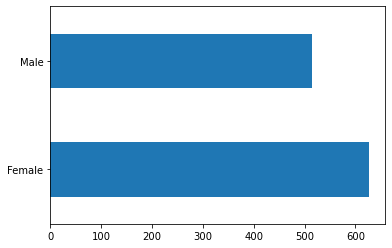

In [135]:
data_s['sex'].value_counts().plot(kind='barh')

In [136]:
data_s['freedom_equality'].value_counts()

Freedom     719
Equality    423
Name: freedom_equality, dtype: int64

<AxesSubplot:>

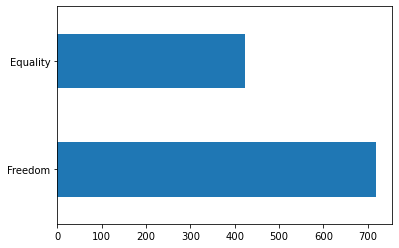

In [137]:
data_s['freedom_equality'].value_counts().plot(kind='barh')

Here is a short description of our categorical variables.

(1) **security_neighborhood**

Q131- Could you tell me how secure do you feel these days in your neighborhood?

This variable has 4 levels. People tend to avoid extremes and answer moderately - 'quite secure' and 'not very secure'. In the than half of cases, people think that they live in a quite secure neighborhood.

This variable was chosen because people are primarily concerned with safety and security, which are basic needs, and only then with additional needs and comfort.

(2) **health**

Q47- All in all, how would you describe your state of health these days?

This variable is expressed in 5 levels. Again, most often people rate their health in the moderate categories - 'fair' and 'good'. However, the responses are dominated by positive assessments. 

Health is a rather personal factor, like family relationships or income. Health is one of the first things that affects the quality of life, and hence the subjective assessment of this quality.

(3) **church_member**

Q94- Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a
member, an active member, an inactive member or not a member of that type of organization? Church or religious
organization

The variable reflects the person's belonging to a religious organization. This belonging is expressed in 3 levels. Very rarely people are active participants in organizations, in most cases they do not even belong to them. 

The variable seems important to me because, using the example of a religious organization, it reflects the presence around a person of people who are close in lifestyle or views. It seems to me that the presence of a circle of close people and the inclusion of a person in some social group can affect life satisfaction.

(4) **internet_source**

Q206- People learn what is going on in this country and the world from various sources. For each of the following sources,
please indicate whether you use it to obtain information daily, weekly, monthly, less than monthly or never: Internet

The variable reflects the frequency of using the Internet as a source of information in 5 levels. The vast majority of respondents - 705 - use the Internet daily. 

I assume the internet is a source with a more diverse set of opinions. There, people have to deal with alternative opinions (in relation to their own) more often than if a person received information from TV, social networks or acquaintances. In the latter cases, people are more likely to fall into information bubbles.

(5) **marital_status**

Q273- Are you currently ....

Marital status has 6 categories, married people are the majority. This variable is again in the category of personal factors, like health.

(6) **sex**

Q260- Sex

2 levels. There are slightly more women than men. (was chosen purely for interaction, other than that no expectations)

(7) **freedom_equality**

Q149- Most people consider both freedom and equality to be important, but if you had to choose between them, which one
would you consider more important?

In the survey, people were asked to choose what is more important to them, freedom or equality. 719 respondents out of 1142 (majority) chose freedom. 

The variable is interesting because here we see what people prioritize in life. That is, how they perceive things can affect their satisfaction with life. I see equality as something more mundane than freedom, the first is more reflected in some basic things, and the second in the spiritual.

(8) **satisfaction**

Q49- All things considered, how satisfied are you with your life as a whole these days? Please use this card to help with
your answer.

From the bar chart we can see that the majority of respondents - 880 - consider that they are satisfied with their life. We remember that all 880 respondents answered from 6 to 10 to tis question, so it would be more accurate to say that that people state the high level of saticfaction with their life. 

### Hypotheses:

In fact, excluding the sex and number of children variables, the remaining variables can be divided into 2 conditional groups: some personal and basic needs - such as the safety of the neighborhood, one's own health and family relationships (marital status) - and something that is slightly further from a person, which depends more on the outside world than on the person himself/herself - membership in a religious organization, information that a person consumes from the Internet, his/her worldview. If the influence of the first group of factors can be universal for everyone, then the more developed the country, the more factors that are more distant from a person begin to influence one's satisfaction with life, because now one is not closed only on himself/herself and on a narrow circle of needs, one's needs are more diverse (if not these factors, then possibly some other similar ones). Japan is such a developed country. **The research question** is whether the impact of non-basic needs would be significant when controlling for basic needs in a developed country like Japan in subjective assessment of life satisfaction?

I can formulate several hypotheses:

+ The safer a person feels in the neighborhood, the more likely one is satisfied with life. 
+ The better a person evaluates own health, the more likely one is satisfied with life. 
+ The greater the level of involvement of a person in a religious organization, the more likely one is satisfied with life. 
+ The more often a person uses the Internet as a source of information, the less likely one is satisfied with life. 
+ The more favorable the marital status of a person (married, living together as married, and so on), the more likely one is satisfied with life. 
+ Men are more likely satisfied with life than women. 
+ The more children, the more likely one is satisfied with life. 
+ People who prefer equality to freedom will be more likely satisfied with life.
+ Person's sex moderate the influence of the number of children on the satisfaction with life. Women with more children are more likely to be satisfied with life.

## (2) Descriptive statistics

Let's make simple bivariate tests to discover the nature of the relations in my data – among the outcome and the predictors. We will make a chi-square teats for pairs of categorical variables and t-test for one pair of categorical (outcome) and numeric (predictor) variables. 

Chi-square test shows whether there is a difference between real and hypothetical data.

I generate a crosstable between each of the predictors and the satisfaction, then apply the chi-square test.

In [138]:
s_FrEq = pd.crosstab(data_s.satisfaction, data_s.freedom_equality, margins=True)
from scipy import stats
obs = np.array([s_FrEq.iloc[0][0:2].values,
                  s_FrEq.iloc[1][0:2].values])
print(stats.chi2_contingency(obs)[0:3])
s_FrEq

(8.886308290144322, 0.0028731708744415283, 1)


freedom_equality,Equality,Freedom,All
satisfaction,,,
0,118,144,262
1,305,575,880
All,423,719,1142


In [139]:
s_sex = pd.crosstab(data_s.satisfaction, data_s.sex, margins=True)
obs = np.array([s_sex.iloc[0][0:2].values,
                  s_sex.iloc[1][0:2].values])
print(stats.chi2_contingency(obs)[0:3])
s_sex

(2.142011714498134, 0.14331384975484257, 1)


sex,Female,Male,All
satisfaction,,,
0,133,129,262
1,494,386,880
All,627,515,1142


In [140]:
s_mar = pd.crosstab(data_s.satisfaction, data_s.marital_status, margins=True)
obs = np.array([s_mar.iloc[0][0:2].values,
                  s_mar.iloc[1][0:2].values])
print(stats.chi2_contingency(obs)[0:3])
s_mar

(0.0, 1.0, 1)


marital_status,Divorced,Living together as married,Married,Separated,Single,Widowed,All
satisfaction,,,,,,,
0,24,4,179,2,40,13,262
1,36,7,671,3,98,65,880
All,60,11,850,5,138,78,1142


In [141]:
s_internet = pd.crosstab(data_s.satisfaction, data_s.internet_source, margins=True)
obs = np.array([s_internet.iloc[0][0:2].values,
                  s_internet.iloc[1][0:2].values])
print(stats.chi2_contingency(obs)[0:3])
s_internet

(0.0, 1.0, 1)


internet_source,Daily,Less than monthly,Monthly,Never,Weekly,All
satisfaction,,,,,,
0,147,6,7,64,38,262
1,558,21,22,181,98,880
All,705,27,29,245,136,1142


In [142]:
s_church = pd.crosstab(data_s.satisfaction, data_s.church_member, margins=True)
obs = np.array([s_church.iloc[0][0:2].values,
                  s_church.iloc[1][0:2].values])
print(stats.chi2_contingency(obs)[0:3])
s_church

(1.7605837365437518, 0.18455172220923882, 1)


church_member,Active member,Don't belong,Inactive member,All
satisfaction,,,,
0,5,240,17,262
1,33,768,79,880
All,38,1008,96,1142


In [143]:
s_health = pd.crosstab(data_s.satisfaction, data_s.health, margins=True)
obs = np.array([s_health.iloc[0][0:2].values,
                  s_health.iloc[1][0:2].values])
print(stats.chi2_contingency(obs)[0:3])
s_health

(26.193715520206595, 3.088259425333657e-07, 1)


health,Fair,Good,Poor,Very good,Very poor,All
satisfaction,,,,,,
0,118,62,59,16,7,262
1,293,377,61,143,6,880
All,411,439,120,159,13,1142


In [144]:
s_security = pd.crosstab(data_s.satisfaction, data_s.security_neighborhood, margins=True)
obs = np.array([s_security.iloc[0][0:2].values,
                  s_security.iloc[1][0:2].values])
print(stats.chi2_contingency(obs)[0:3])
s_security

(1.0577107038888023, 0.3037379016009974, 1)


security_neighborhood,Not at all secure,Not very secure,Quite secure,Very Secure,All
satisfaction,,,,,
0,18,121,121,2,262
1,29,285,534,32,880
All,47,406,655,34,1142


H0: there **is no** difference between the predictor in the frequency of satisfaction;

H1: there **is** difference between the predictor in the frequency of satisfaction.

We should look at the p-value, which is the 2nd in the output.

So, we can reject H0 for **'freedom_equality' and 'health'** predictors only (p-values for which is less than 0.05). Therefore, there is signifacant difference between distribution of real and hypothetical data for 'freedom_equality' and 'health' variables. Then, the relationships between freedom or equality choice and satisfaction with life and between health and satisfaction with life are present.

The t-test quantifies the difference between the arithmetic means of the two samples.

Our 2 samples are the number of children variable divided into 2 part based on the satisfaction status (0 or 1). Firstly, we divide our numeric variable into 2 groups, then apply the t-test. 

In [145]:
grouped_lists = data_s.groupby('satisfaction')['children_num'].apply(list)
print(stats.ttest_ind(a=grouped_lists[0], b=grouped_lists[1], equal_var=True))
grouped_lists

Ttest_indResult(statistic=-2.5008849315978847, pvalue=0.012527808736550126)


satisfaction
0    [3, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, ...
1    [2, 3, 3, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 1, ...
Name: children_num, dtype: object

T-test's hypotheses:

H0: µ1 = µ2 (means of both samples are **equal**)

H1: µ1 ≠ µ2 (mean of one sample is **different** from mean of another sample)

Since the p-value is small enough (0.01), we can reject the null hypothesis of the test. The mean number of children between the two groups of satisfied and dissatisfied people is different. Then, the relationships between **the number of children** and satisfaction with life are present.

## (3) Regression analysis

Check whether types of variables are correct and construct the model of logistic regression.

In [146]:
data_s['satisfaction'] = data_s['satisfaction'].astype(float)
data_s.dtypes

satisfaction             float64
security_neighborhood     object
health                    object
church_member             object
internet_source           object
marital_status            object
children_num               int32
sex                       object
freedom_equality          object
dtype: object

In [147]:
from statsmodels.formula.api import logit
log1 = logit("satisfaction ~ security_neighborhood + health + church_member + internet_source + marital_status + children_num + sex + freedom_equality", data=data_s).fit()
log1.summary()

Optimization terminated successfully.
         Current function value: 0.470464
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                 1142
Model:                          Logit   Df Residuals:                     1120
Method:                           MLE   Df Model:                           21
Date:                Wed, 30 Mar 2022   Pseudo R-squ.:                  0.1265
Time:                        13:54:29   Log-Likelihood:                -537.27
converged:                       True   LL-Null:                       -615.06
Covariance Type:            nonrobust   LLR p-value:                 1.525e-22
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.0754      0.688      0.109      0.913      -1.274       1.424
security_neighborhood[T.Not very secure]         0.5296      0.357      1.484      0.138      -0.170       1.229
security_neighborhood[T.Quite secure]            1.1407      0.354      3.218      0.001       0.446       1.835
security_neighborhood[T.Very Secure]             2.3439      0.834      2.811      0.005       0.710       3.978
health[T.Good]                                   0.9211      0.182      5.051      0.000       0.564       1.278
health[T.Poor]                                  -0.6881      0.227     -3.038      0.002      -1.132      -0.244
health[T.Very good]                              1.3494      0.294      4.590      0.000       0.773       1.926
health[T.Very poor]                             -0.9988      0.618     -1.617      0.106      -2.209       0.211
church_member[T.Don't belong]                   -1.1114      0.539     -2.063      0.039      -2.167      -0.056
church_member[T.Inactive member]                -0.4837      0.600     -0.807      0.420      -1.659       0.691
internet_source[T.Less than monthly]             0.0303      0.518      0.058      0.953      -0.985       1.046
internet_source[T.Monthly]                      -0.3411      0.485     -0.704      0.482      -1.291       0.609
internet_source[T.Never]                        -0.2717      0.197     -1.380      0.167      -0.657       0.114
internet_source[T.Weekly]                       -0.4527      0.232     -1.954      0.051      -0.907       0.001
marital_status[T.Living together as married]     0.1001      0.749      0.134      0.894      -1.369       1.569
marital_status[T.Married]                        0.8368      0.309      2.706      0.007       0.231       1.443
marital_status[T.Separated]                     -0.8090      0.992     -0.815      0.415      -2.754       1.136
marital_status[T.Single]                         0.5557      0.383      1.450      0.147      -0.195       1.307
marital_status[T.Widowed]                        1.4517      0.447      3.251      0.001       0.577       2.327
sex[T.Male]                                     -0.2775      0.157     -1.762      0.078      -0.586       0.031
freedom_equality[T.Freedom]                      0.4113      0.157      2.627      0.009       0.104       0.718
children_num                                     0.1182      0.087      1.356      0.175      -0.053       0.289
================================================================================================================
"""

In [148]:
odds1 = pd.DataFrame()
odds1['odds ratio'] = np.exp(log1.params)
odds1 = pd.concat([odds1, np.exp(log1.conf_int())], axis=1)
odds1.columns = ['odds ratio', '0.025', '0.095']
odds1 

,odds ratio,0.025,0.095
Intercept,1.078267,0.279807,4.155225
security_neighborhood[T.Not very secure],1.698327,0.843731,3.418526
security_neighborhood[T.Quite secure],3.128920,1.561958,6.267867
security_neighborhood[T.Very Secure],10.421573,2.033579,53.407891
health[T.Good],2.511978,1.757121,3.591120
health[T.Poor],0.502505,0.322347,0.783353
health[T.Very good],3.855186,2.166727,6.859406
health[T.Very poor],0.368315,0.109798,1.235504
church_member[T.Don't belong],0.329084,0.114504,0.945785
church_member[T.Inactive member],0.616494,0.190362,1.996535


### Model description
The first model has the 'satisfaction' as a response variable and the following set of predictors: security_neighborhood + health + church_member + internet_source + marital_status + children_num + sex + freedom_equality. 

### Log odds
Several levels of **security_neighborhood, health, church_member, marital_status and freedom_equality** turn out to be significant (p-values are less than 0.05). Looking at log odds we can access the direction of these relations: negative or positive one. Thus, people who assess their neighborhood as Quite secure and Very secure have more chances than people who say that their neighborhood is Not secure at all (reference category). Respondents with Good and Very good health have more chances to be satisfied with life than people with Fair health (reference category), but Poor helth has an opposite effect. Not belonging to religious organization decreases the chances of being satisfied with life compared to the reference category of being an Active member. Being Married and Widowed increases the chances of being satisfied with life compared to being Divorced. Prioritizing Freedom under Equality increases tha chances of being satisfied with life compared to the opposite.

### Odds ratio
The odds ratio table is shown above. 

Assessing the security of the neighborhood as Quite secure and Very secure have 3.13 and 10.42 chances compared to 1 chance of assessing as Not secure at all to be satisfied with life, **thus respondents with, subjectively, quite secure and very secure neighborhoods have 213% and 942% more chances, respectively.**

People with Good and Very good health have 2.51 and 3.86 chances compared to 1 chance of people with Fair health to be satisfied with life, **thus respondents with, subjectively, good and very good health have 151% and 286% more chances, respectively.** People with Poor health have 0.50 chances compared to 1 chance of people with Fair health to be satisfied with life, **thus respondents with, subjectively, poor health have 50% and 63% more chances, respectively.**

Not belonging to religious organization have 0.33 chances compared to 1 chance of being an Active member to be satisfied with life, **thus respondents who are not a member of religious organization have 67% less chances.**

Being Married and being Widowed have 2.31 and 4.27 chances compared to 1 chance of being Divorced to be satisfied with life, **thus married and widowed respondents have 131% and 327% more chances, respectively.** (the later pair of comparison widowed/divorced is kinda funny)

Prioratizing Freedom have 1.51 chances compared to 1 chance of prioritizing Equality to be satisfied with life, **thus respondents who choose freedom under equality have 51% more chances.**

### Model fit
The Pseudo R-squared value is 0.13, which means that the model explains around 13% of the variations in the response variable can be explained by our predictors. So, the predictive capacity of our model is low, but the predictors were chosen randomly, there was no theoretical basis, so this is fair. But it is still better than the null model without any predictors, what we can see comparing log-likelihood and ll-null (-537.27 and -615.06, respectively).

### Same regression model with interaction: the number of children with sex

In [149]:
log2 = logit("satisfaction ~ security_neighborhood + health + church_member + internet_source + marital_status + children_num * sex + freedom_equality", data=data_s).fit()
log2.summary()

Optimization terminated successfully.
         Current function value: 0.470421
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                 1142
Model:                          Logit   Df Residuals:                     1119
Method:                           MLE   Df Model:                           22
Date:                Wed, 30 Mar 2022   Pseudo R-squ.:                  0.1265
Time:                        13:54:33   Log-Likelihood:                -537.22
converged:                       True   LL-Null:                       -615.06
Covariance Type:            nonrobust   LLR p-value:                 4.052e-22
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.1262      0.708      0.178      0.858      -1.261       1.513
security_neighborhood[T.Not very secure]         0.5290      0.357      1.482      0.138      -0.170       1.228
security_neighborhood[T.Quite secure]            1.1399      0.354      3.216      0.001       0.445       1.835
security_neighborhood[T.Very Secure]             2.3422      0.834      2.808      0.005       0.708       3.977
health[T.Good]                                   0.9204      0.182      5.048      0.000       0.563       1.278
health[T.Poor]                                  -0.6858      0.227     -3.025      0.002      -1.130      -0.241
health[T.Very good]                              1.3464      0.294      4.579      0.000       0.770       1.923
health[T.Very poor]                             -1.0045      0.618     -1.625      0.104      -2.216       0.207
church_member[T.Don't belong]                   -1.1212      0.540     -2.076      0.038      -2.180      -0.063
church_member[T.Inactive member]                -0.4885      0.600     -0.814      0.416      -1.665       0.688
internet_source[T.Less than monthly]             0.0307      0.518      0.059      0.953      -0.985       1.046
internet_source[T.Monthly]                      -0.3433      0.485     -0.709      0.479      -1.293       0.606
internet_source[T.Never]                        -0.2731      0.197     -1.387      0.165      -0.659       0.113
internet_source[T.Weekly]                       -0.4570      0.232     -1.968      0.049      -0.912      -0.002
marital_status[T.Living together as married]     0.0928      0.750      0.124      0.902      -1.377       1.563
marital_status[T.Married]                        0.8351      0.309      2.700      0.007       0.229       1.441
marital_status[T.Separated]                     -0.8094      0.993     -0.815      0.415      -2.755       1.136
marital_status[T.Single]                         0.5525      0.383      1.441      0.150      -0.199       1.304
marital_status[T.Widowed]                        1.4545      0.447      3.257      0.001       0.579       2.330
sex[T.Male]                                     -0.3486      0.276     -1.261      0.207      -0.890       0.193
freedom_equality[T.Freedom]                      0.4112      0.157      2.625      0.009       0.104       0.718
children_num                                     0.0953      0.114      0.837      0.403      -0.128       0.318
children_num:sex[T.Male]                         0.0433      0.138      0.313      0.754      -0.228       0.314
================================================================================================================
"""

In [150]:
odds2 = pd.DataFrame()
odds2['odds ratio'] = np.exp(log2.params)
odds2 = pd.concat([odds2, np.exp(log2.conf_int())], axis=1)
odds2.columns = ['odds ratio', '0.025', '0.095']
odds2

,odds ratio,0.025,0.095
Intercept,1.134516,0.283350,4.542539
security_neighborhood[T.Not very secure],1.697161,0.843265,3.415716
security_neighborhood[T.Quite secure],3.126405,1.560882,6.262105
security_neighborhood[T.Very Secure],10.404386,2.029005,53.351885
health[T.Good],2.510369,1.756010,3.588790
health[T.Poor],0.503692,0.322969,0.785541
health[T.Very good],3.843600,2.159979,6.839539
health[T.Very poor],0.366220,0.109006,1.230358
church_member[T.Don't belong],0.325891,0.113095,0.939077
church_member[T.Inactive member],0.613524,0.189230,1.989181


### Model description
The first model has the 'satisfaction' as a response variable and the following set of predictors: security_neighborhood + health + church_member + internet_source + marital_status + + children_num * sex + freedom_equality. I added **nteraction effect between the number of children and sex**. I expect sex to moderate the relation between the number of children and satisfaction with life.

### Log odds
Several levels of **security_neighborhood, health, church_member, internet_source, marital_status and freedom_equality** turn out to be significant (p-values are less than 0.05). I won't interpret that all again: our old significant predictors remain to be significant, they can slightly change the p-value or the odds ration, but it is not so critical.

The only visible change is internet_source became significant. Consuming information from the internet Weekly negatively affect the chances of satisfaction with life compared to the reference category of consuming information from the internet Daily.

Our interaction effect is not significant here.

### Odds ratio
The odds ratio table is shown above. 

Again, approximately the same for our old significant variables.

Consuming information from the internet Weekly have 0.63 to 1 chance of consuming information from the internet Daily to be satisfied with life, **thus respondents who consume information from the internet weekly have 37% less chances.**

### Model fit
The Pseudo R-squared value is 0.13, which means that the model explains around 13% of the variations in the response variable can be explained by our predictors. So, the predictive capacity of our model is low. But it is still better than the null model without any predictors, what we can see comparing log-likelihood and ll-null (-537.22 and -615.06, respectively).

### Here I show some plot concerning the interaction effect between the number of children and sex

Below one can see the histogram of children_num variable grouped and colored by sex. Proportion of women increases by rising the number of children.

<AxesSubplot:xlabel='children_num', ylabel='Count'>

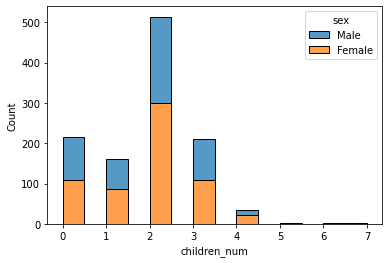

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.histplot(binwidth=0.5, x="children_num", hue="sex", data=data_s, stat="count", multiple="stack")

Here I tried to make a scatterplot which would show all 3 variables at once. The horizontal variable is the number of children, the vertical is the outcome variable, satisfaction with life, and the color is the sex variable. It's hard to see something because the dots overlap each other.

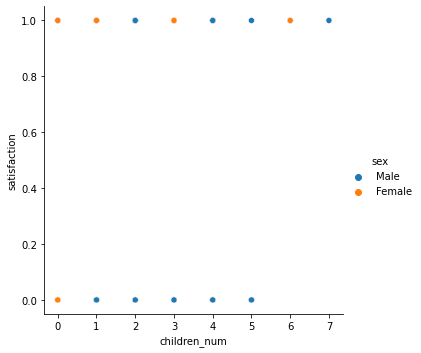

In [152]:
import seaborn as sns
sns.relplot(x=data_s["children_num"], y=data_s['satisfaction'], hue=data_s["sex"])

### Model fit comparison

In [153]:
import scipy

ll1 = log1.llf
ll2 = log2.llf
LR_statistics = -2*(ll1-ll2)
print(LR_statistics)

df = 1
p_val = scipy.stats.chi2.sf(LR_statistics, df)
print(p_val)

0.0980228910614187
0.7542152673515516


We have to compare the two models in order to choose the better one.

Likelihood ratio test was used to determine if these two models are significantly different. Hypotheses are the following:

H0: The full model and the reduced model fit the data **equally well.** There is no reason to use the extended model.

H1: The full model fits the data significantly **better** than the reduced model. Thus, one should use the full model.

I took the log-likelihood values from both models, calculated the statistics. Then produced the p-value for it using degrees of freedom equal 1 (that is the difference in dfs of two models (22-21)). 

We cannot regect the zero hypothesis, because the p-value is greater than 0.05 (0.75). The second model, in which interaction was added, did not perform better than the first one. **= = > We should use the first (reduced) model.**

### Discussion

#### Confirmed hypotheses:
+ The safer a person feels in the neighborhood, the more likely one is satisfied with life. 
+ The better a person evaluates own health, the more likely one is satisfied with life. 
+ The more favorable the marital status of a person (married, living together as married, and so on), the more likely one is satisfied with life.
+ The greater the level of involvement of a person in a religious organization, the more likely one is satisfied with life.

#### Rejected:
+ The more often a person uses the Internet as a source of information, the less likely one is satisfied with life.  
+ People who prefer equality to freedom will be more likely satisfied with life.

The rejected hypotheses should be interpreted in the opposite direction: people who consume information from the Internet more often (daily) are more likely to be satisfied with life than people who consume information from the Internet less often (weekly); people who prefer freedom over equality have a greater chance of being satisfied with life.

Thus, we found that the satisfaction of basic needs, examples of which were presented in the analysis (safety in the neighborhood, one's own health, family relationships) are related to a person's satisfaction with life. Feeling safe in the neighborhood, having good health, favorable family relationships, increase a person's chances of feeling satisfied with life. However, additional needs that are an integral and important part of a person's life in a developed country also affect a person's satisfaction with life (belonging to a religious organization, obtaining information via the Internet (in an extended model), a person's priority values), albeit to a lesser extent. Being an active member of a religious organization, consuming information from the Internet on a daily basis, prioritizing freedom over equality, increases a person's chances of feeling satisfied with life. 

This means that in Japanese are getting used to expanding the range of their needs, and now their satisfaction with life depends on the satisfaction of them too. I would explain this by the fact that the quality of life in developed countries is higher. However, to confirm this, one needs to conduct a study with a similar research question with a range of countries. Also, this analysis was an attempt to create some kind of latent quality of life variable. But for sure, international organizations also evaluate this indicator with the help of a number of variables, the quality of life variable could also be included in the analysis.

An unexpected finding is that widowed people feel more satisfied with life than divorced people. Although it is difficult to say here which of these marital statuses would be more favorable. The fact that people who prioritize freedom over equality feel more satisfied with life was also unexpected. I would explain this by the fact that probably the policy of the state favors freedom, which is reflected in the fact that people who appreciate it feel better. However, I expected the opposite, based on how much public money Japan spends on the social sphere, support for the elderly and fertility (due to the population aging). I know the controversial stories about lifetime employment, great reputation impact, and big trouble finding a new job after being fired, so maybe that's the reason.

The disadvantage of the study is of course its non-systematic nature, the predictors were chosen as examples and in a mild sense randomly, there is no theoretical basis for such a choice. Also, the outcome variable was encoded as binary when previously presented in the form of 10 scales. Thus, the construction of an ordinal regression model would be desirable. The levels of some predictors include only a few cases (less than 5 or 10), perhaps such levels should be combined with others.

## Exploratory Factor Analysis

Importing the data

In [154]:
data = pd.read_excel("C:/Users/ЛИЗА/Documents/F00010946-WVS_Wave_7_Japan_Excel_v2.0.xlsx")
data.head()

C:\ProgramData\Anaconda3\envs\text_m\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,version: Version of Data File,doi: Digital Object Identifier,B_COUNTRY: ISO 3166-1 numeric country code,B_COUNTRY_ALPHA: ISO 3166-1 alpha-3 country code,C_COW_NUM: CoW country code numeric,C_COW_ALPHA: CoW country code alpha,A_YEAR: Year of survey,D_INTERVIEW: Interview ID,J_INTDATE: Date of interview,FW_END: Year/month of end-fieldwork,...,WEIGHT4A: Overall Secular Values-4: Weight 4a,WEIGHT4B: Emancipative Values-4: Weight 4b,RESEMAVALBWGT: Weight for Emancipative values,RESEMAVALWGT: Weight for Emancipative values,SECVALBWGT: Weight for overall secular values Short Version,Y001_1: Materialist/postmaterialist 12-item index: Component 1,Y001_2: Materialist/postmaterialist 12-item index: Component 2,Y001_3: Materialist/postmaterialist 12-item index: Component 3,Y001_4: Materialist/postmaterialist 12-item index: Component 4,Y001_5: Materialist/postmaterialist 12-item index: Component 5
0,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,392.0,JPN,740.0,JPN,2019.0,392070001.0,20190912.0,201909.0,...,1.0,1.00,1.0,1.000,1.0,1.0,1.0,1.0,0.0,1.0
1,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,392.0,JPN,740.0,JPN,2019.0,392070002.0,20190916.0,201909.0,...,1.0,1.00,1.0,1.000,1.0,1.0,1.0,0.0,1.0,1.0
2,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,392.0,JPN,740.0,JPN,2019.0,392070003.0,20190915.0,201909.0,...,1.0,1.00,1.0,1.000,1.0,0.0,0.0,1.0,0.0,1.0
3,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,392.0,JPN,740.0,JPN,2019.0,392070004.0,20190915.0,201909.0,...,1.0,1.00,1.0,1.000,1.0,1.0,1.0,1.0,0.0,1.0
4,1-5-0 (2020-11-16),doi.org/10.14281/18241.1,392.0,JPN,740.0,JPN,2019.0,392070005.0,20190913.0,201909.0,...,1.0,0.66,1.0,0.915,1.0,-2.0,-2.0,-2.0,-2.0,-2.0


I have chosen 11 variables to be used in the factor analysis.

In [155]:
fa = data[['Q1: Important in life: Family', 'Q4: Important in life: Politics', 'Q6: Important in life: Religion', 'Q5: Important in life: Work', 'Q58: Trust: Your family', 'Q62: Trust: People of another religion', 'Q63: Trust: People of another nationality', 'Q60: Trust: People you know personally', 'Q71: Confidence: The Government', 'Q73: Confidence: Parliament', 'Q66: Confidence: The Press']]
fa.head()

,Q1: Important in life: Family,Q4: Important in life: Politics,Q6: Important in life: Religion,Q5: Important in life: Work,Q58: Trust: Your family,Q62: Trust: People of another religion,Q63: Trust: People of another nationality,Q60: Trust: People you know personally,Q71: Confidence: The Government,Q73: Confidence: Parliament,Q66: Confidence: The Press
0,1.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0
1,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0
2,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,2.0,2.0,2.0,-1.0
3,2.0,2.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0,2.0
4,1.0,4.0,4.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,3.0


In [156]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler

We need to scale our variables (just in case, because in fact there is not much difference between the scales)

In [157]:
scaler = StandardScaler()
scaler.fit(fa)
feature_names = fa.columns
pd.DataFrame(scaler.transform(fa), columns=feature_names)

,Q1: Important in life: Family,Q4: Important in life: Politics,Q6: Important in life: Religion,Q5: Important in life: Work,Q58: Trust: Your family,Q62: Trust: People of another religion,Q63: Trust: People of another nationality,Q60: Trust: People you know personally,Q71: Confidence: The Government,Q73: Confidence: Parliament,Q66: Confidence: The Press
0,-0.134952,-0.052280,0.114704,-0.698324,-0.428492,0.260186,0.327781,0.109888,0.537417,-0.271502,-1.409010
1,-0.134952,-1.021244,0.764054,-0.698324,-0.428492,0.260186,0.327781,0.109888,0.537417,0.475129,-0.204720
2,-0.134952,-1.021244,-1.183996,-0.698324,-0.428492,-1.192489,-1.182391,0.109888,-0.275922,-0.271502,-3.817589
3,2.236340,-0.052280,0.114704,0.303619,2.874924,0.744411,1.334562,0.109888,1.350757,1.221759,-0.204720
4,-0.134952,1.885648,0.764054,-0.698324,-0.428492,0.744411,0.327781,0.109888,-0.275922,-0.271502,0.999569
...,...,...,...,...,...,...,...,...,...,...,...
1348,-0.134952,-0.052280,-0.534646,-0.698324,-0.428492,0.260186,0.327781,-1.108792,-2.715941,-2.511394,-0.204720
1349,-0.134952,-1.021244,0.114704,-0.698324,-0.428492,1.228636,1.334562,1.328569,0.537417,0.475129,-0.204720
1350,-0.134952,-1.021244,-0.534646,0.303619,1.223216,1.228636,0.831171,0.109888,-3.529280,0.475129,0.999569
1351,-0.134952,-0.052280,0.764054,-0.698324,1.223216,1.228636,1.334562,0.109888,-0.275922,0.475129,0.999569


Look at the heatmap with correlations, because our variables should correlate if we want to apply factor analysis on them. In other case we would not get any factors.

<AxesSubplot:>

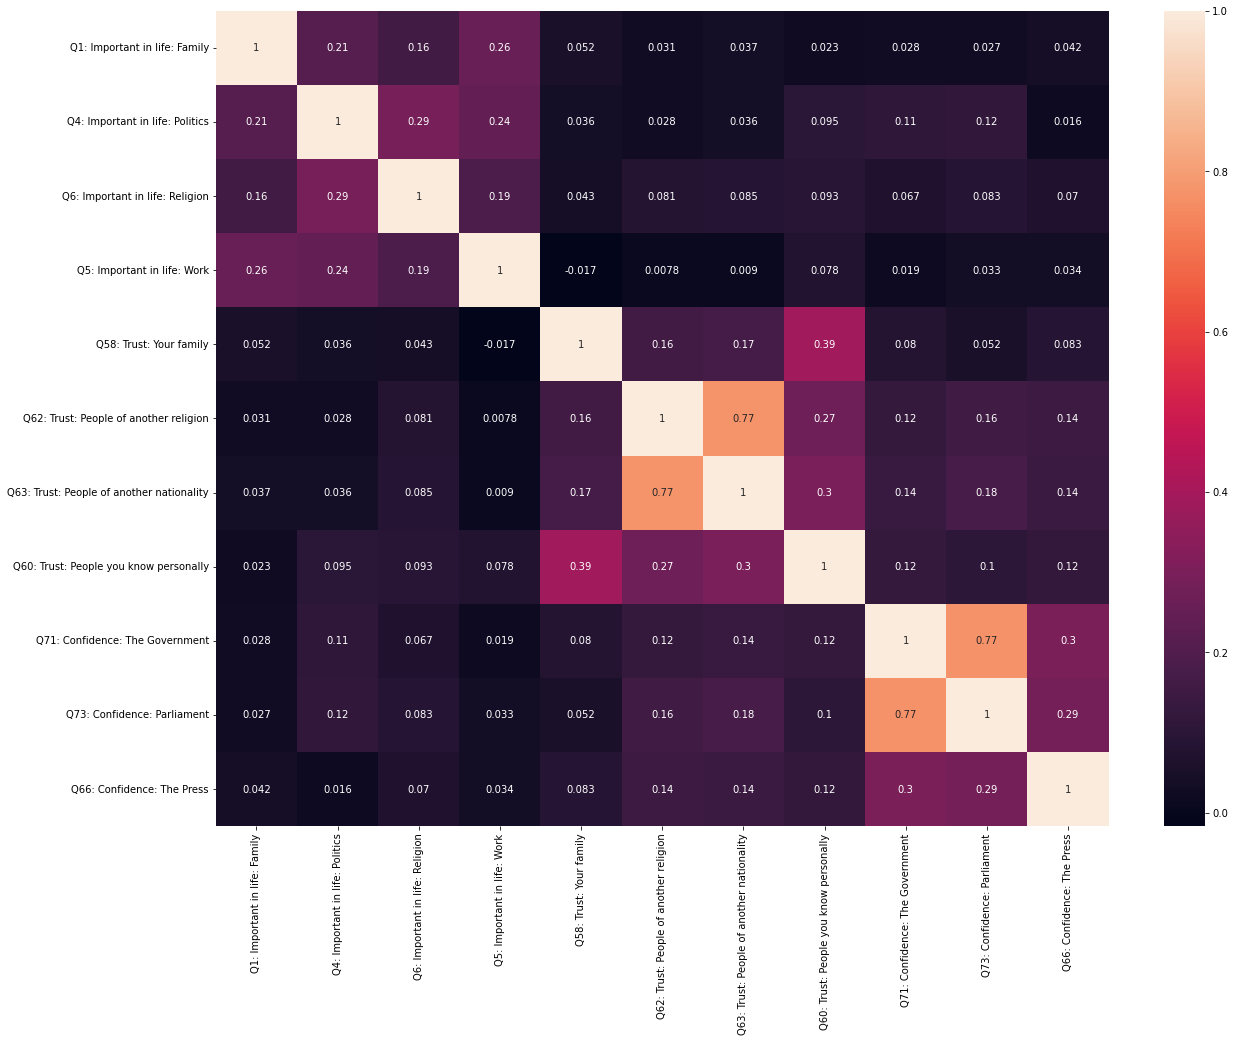

In [158]:
plt.figure(figsize=(20,15))
sns.heatmap(np.corrcoef(fa, rowvar=False),annot=True,
           xticklabels=fa.columns, yticklabels=fa.columns)

#### Factorability Test 

Factorability means "can we found the factors in the dataset?". Bartlett’s Test will be used.

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [159]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(fa)
chi_square_value, p_value

(3454.4633305108932, 0.0)

The p-value is less than 0.05, then we can employ a factor analysis with the current variables.

#### Choosing the number of factors 

We can employ several methods:

(1) the Kaiser criterion
Remove the factors, which eigenvalues are less than 1. 

**= = > 4 factors are optimal**

In [160]:
fac = FactorAnalyzer(rotation=None, n_factors=fa.shape[1])
fac.fit(fa)
ev, v = fac.get_eigenvalues()
ev

array([2.52768749, 1.63220628, 1.57148161, 1.10259647, 0.88789525,
       0.82183067, 0.7614755 , 0.67563691, 0.56751122, 0.22989915,
       0.22177946])

(2) Scree plot

As one moves to the right, toward later components, the eigenvalues drop. When the drop ceases and the curve makes an elbow toward less steep decline, Cattell's scree test says to drop all further components after the one starting at the elbow.

**= = > 4 factors are optimal**

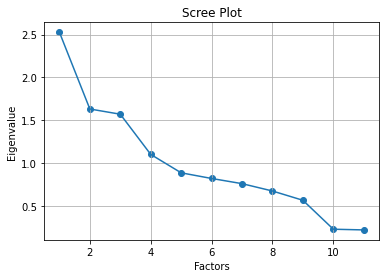

In [161]:
plt.scatter(range(1,fa.shape[1]+1),ev)
plt.plot(range(1,fa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

(3) Parallel analysis

Simulation method that compares the observed eigenvalues with those obtained from uncorrelated normal variables. A factor or component is retained if the associated eigenvalue is bigger than the 95th percentile of the distribution of eigenvalues derived from the random data.

**= = > 4 factors are optimal**

In [162]:
def ParallelAnalysis(data, K=100, printEigenvalues=False):
    ################
    # Create a random matrix to match the dataset
    ################
    n, m = data.shape
    # Set the factor analysis parameters
    fa = FactorAnalyzer(n_factors=1, method='ml', rotation=None, use_smc=True)
    # Create arrays to store the values
    sumComponentEigens = np.empty(m)
    sumFactorEigens = np.empty(m)
    # Run the fit 'K' times over a random matrix
    for runNum in range(0, K):
        fa.fit(np.random.normal(size=(n, m)))
        sumComponentEigens = sumComponentEigens + fa.get_eigenvalues()[0]
        sumFactorEigens = sumFactorEigens + fa.get_eigenvalues()[1]
    # Average over the number of runs
    avgComponentEigens = sumComponentEigens / K
    avgFactorEigens = sumFactorEigens / K
    ################
    # Get the eigenvalues for the fit on supplied data
    ################
    fa.fit(data)
    dataEv = fa.get_eigenvalues()
    # Set up a scree plot
    plt.figure(figsize=(8, 6))
    ################
    ### Print results
    ################
    if printEigenvalues:
        print('Principal component eigenvalues for random matrix:\n', avgComponentEigens)
        print('Factor eigenvalues for random matrix:\n', avgFactorEigens)
        print('Principal component eigenvalues for data:\n', dataEv[0])
        print('Factor eigenvalues for data:\n', dataEv[1])
    # Find the suggested stopping points
    suggestedFactors = sum((dataEv[1] - avgFactorEigens) > 0)
    suggestedComponents = sum((dataEv[0] - avgComponentEigens) > 0)
    print('Parallel analysis suggests that the number of factors = ', suggestedFactors , ' and the number of components = ', suggestedComponents)
    ################
    ### Plot the eigenvalues against the number of variables
    ################
    # Line for eigenvalue 1
    plt.plot([0, m+1], [1, 1], 'k--', alpha=0.3)
    # For the random data - Components
    plt.plot(range(1, m+1), avgComponentEigens, 'b', label='PC - random', alpha=0.4)
    # For the Data - Components
    plt.scatter(range(1, m+1), dataEv[0], c='b', marker='o')
    plt.plot(range(1, m+1), dataEv[0], 'b', label='PC - data')
    # For the random data - Factors
    plt.plot(range(1, m+1), avgFactorEigens, 'g', label='FA - random', alpha=0.4)
    # For the Data - Factors
    plt.scatter(range(1, m+1), dataEv[1], c='g', marker='o')
    plt.plot(range(1, m+1), dataEv[1], 'g', label='FA - data')
    plt.title('Parallel Analysis Scree Plots', {'fontsize': 20})
    plt.xlabel('Factors/Components', {'fontsize': 15})
    plt.xticks(ticks=range(1, m+1), labels=range(1, m+1))
    plt.ylabel('Eigenvalue', {'fontsize': 15})
    plt.legend()
    plt.show();

Parallel analysis suggests that the number of factors =  4  and the number of components =  0


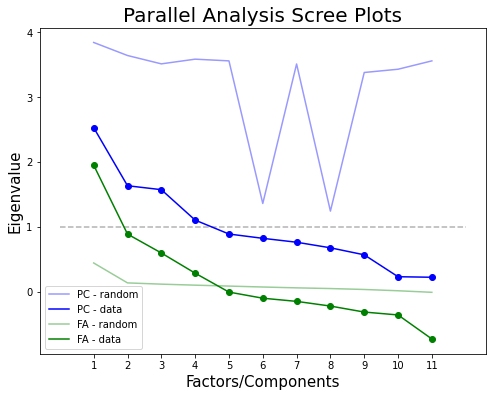

In [163]:
ParallelAnalysis(fa)

### Performing Factor Analysis

In [164]:
# some functions for better interpretation
# loadings with feature and factor names
def print_loadings(loadings, feature_names):
    n_factors = loadings.shape[1]
    factor_names = [f'F{i+1}' for i in range(n_factors)]
    data = pd.DataFrame(loadings)
    data.columns = factor_names
    data.index = feature_names
    return data
# get factors with the variables they represent
def print_variables_for_factors(loadings, feature_names, threshold=0.3):
    loadings = np.copy(loadings)
    loadings[np.abs(loadings) < threshold] = 0
    no_factor = np.arange(loadings.shape[0])[np.sum(loadings, axis=1) == 0]
    
    var_factors = np.argmax(np.abs(loadings), axis=1)
    var_factors[no_factor] = -1
    n_factors = loadings.shape[1]
    
    for i in range(n_factors):
        print(f'F{i+1}: {list(feature_names[var_factors == i])}')
    if no_factor.shape[0] > 0:
        print(f'no factor: {feature_names[no_factor].to_list()}')
def print_variance_summary(fa):
    n_factors = fa.n_factors
    factor_names = [f'F{i+1}' for i in range(n_factors)]
    variance, proportional_variance, cumulative_variances = fa.get_factor_variance()
    var_matrix = np.vstack([variance, proportional_variance, cumulative_variances])
    data = pd.DataFrame(var_matrix,columns=factor_names)
    data.index = ["variance", "proportional_variance", "cumulative_variances"]
    return data

The number of factors is **4**. 

The type of rotation is **oblique**, because this rotation allows correlation between factors; I tend to think that my factors can correlate, so I allow that correlation. 

In [165]:
fa2 = FactorAnalyzer(rotation='promax', n_factors=4, method='ml')
fa2.fit(fa)

FactorAnalyzer(method='ml', n_factors=4, rotation_kwargs={})

In [166]:
print_loadings(fa2.loadings_, fa.columns)

,F1,F2,F3,F4
Q1: Important in life: Family,-0.023027,0.020126,-0.043435,0.430229
Q4: Important in life: Politics,0.054951,-0.038298,0.015501,0.541724
Q6: Important in life: Religion,0.013490,0.043832,0.009461,0.444396
Q5: Important in life: Work,-0.035807,-0.038175,0.025106,0.482702
Q58: Trust: Your family,0.007012,0.031460,0.382382,-0.006936
Q62: Trust: People of another religion,-0.020067,0.895131,-0.021080,-0.006408
Q63: Trust: People of another nationality,-0.004283,0.879054,0.006710,-0.000866
Q60: Trust: People you know personally,-0.036744,-0.080768,1.034180,0.010551
Q71: Confidence: The Government,0.938124,-0.097638,-0.024848,-0.029601
Q73: Confidence: Parliament,0.873052,-0.028861,-0.060106,0.001816


### Loadings

The factor loading is a matrix which shows the relationship of each variable to the underlying factor. It shows the correlation coefficient for observed variable and factor. It shows the variance explained by the observed variables.

Loadings close to -1 or 1 indicate that the factor strongly influences the variable. Loadings close to 0 indicate that the factor has a weak influence on the variable.

As a rule of thumb, your variable should have a rotated factor loading of at least |0.4| (meaning ≥ +.4 or ≤ –.4) onto one of the factors in order to be considered important. **Almost all our variables follow that rule.**

### Now let's group our variables by factors

In [167]:
print_variables_for_factors(fa2.loadings_, fa.columns)

F1: ['Q71: Confidence: The Government', 'Q73: Confidence: Parliament', 'Q66: Confidence: The Press']
F2: ['Q62: Trust: People of another religion', 'Q63: Trust: People of another nationality']
F3: ['Q58: Trust: Your family', 'Q60: Trust: People you know personally']
F4: ['Q1: Important in life: Family', 'Q4: Important in life: Politics', 'Q6: Important in life: Religion', 'Q5: Important in life: Work']


All Confidence quastions go to the Factor 1.

All Important to life questions go to the Factor 4.

Trust questions were splitted into two factors. More abstract questions about trust towards people of another religion and nationality go to the Factor 2. More direct questions about trust towards your family and people one knows personally go to the Factor 3.

**Although we expected to see 3 factors - Confidence, Trust, Important in life - factor analysis showed that 4 factors are present here.**

In [168]:
print_variance_summary(fa2)

,F1,F2,F3,F4
variance,1.748708,1.600612,1.224728,0.910263
proportional_variance,0.158973,0.145510,0.111339,0.082751
cumulative_variances,0.158973,0.304484,0.415823,0.498574


Here we can see proportional and cumulative variances of our factors, that is how much of our data the factor explain. The proportional variance is highest for Factor 1, then goes down. Overall, 4 factors explain almost 50% of the variance in the original variables.

### Export our factors and transform them into dataframe

In [169]:
data_fa = fa2.transform(fa)
data_fa.shape

(1353, 4)

In [170]:
data_fa

array([[ 0.13422272,  0.1848809 ,  0.26214736, -0.23078689],
       [ 0.15013158,  0.49571388,  0.30782688, -0.35686843],
       [-0.00433591, -0.56424917, -1.21430493, -0.95165921],
       ...,
       [ 0.12909553, -1.76486938,  1.02725658, -0.37060129],
       [ 0.21754065,  0.18981349,  1.29007043,  0.01114283],
       [ 0.18754381,  0.58163993,  0.78705538,  0.43822523]])

In [171]:
data_fa = pd.DataFrame(data_fa, columns=['F1', 'F2', 'F3', 'F4']) 
data_fa

,F1,F2,F3,F4
0,0.134223,0.184881,0.262147,-0.230787
1,0.150132,0.495714,0.307827,-0.356868
2,-0.004336,-0.564249,-1.214305,-0.951659
3,0.238816,1.351033,1.079349,0.688954
4,0.136832,-0.122898,0.531938,0.639678
...,...,...,...,...
1348,-1.140473,-2.547077,0.142851,-0.544341
1349,1.406892,0.644312,1.314145,-0.429258
1350,0.129096,-1.764869,1.027257,-0.370601
1351,0.217541,0.189813,1.290070,0.011143


### Merge two our datasets: the one for logistic regression and the one from factor analysis

In [172]:
out = pd.concat([data_s, data_fa], axis=1, join='inner')
out

,satisfaction,security_neighborhood,health,church_member,internet_source,marital_status,children_num,sex,freedom_equality,F1,F2,F3,F4
0,1.0,Not very secure,Good,Don't belong,Daily,Married,2,Male,Freedom,0.134223,0.184881,0.262147,-0.230787
1,1.0,Quite secure,Good,Don't belong,Never,Married,3,Male,Equality,0.150132,0.495714,0.307827,-0.356868
2,1.0,Not very secure,Good,Inactive member,Daily,Married,3,Male,Freedom,-0.004336,-0.564249,-1.214305,-0.951659
5,0.0,Not at all secure,Good,Don't belong,Never,Married,3,Female,Freedom,2.612448,1.567793,1.428614,0.419791
6,1.0,Quite secure,Fair,Don't belong,Never,Married,2,Female,Freedom,1.407060,0.588433,1.281775,-0.918395
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,1.0,Not very secure,Good,Inactive member,Daily,Married,3,Female,Equality,-1.140473,-2.547077,0.142851,-0.544341
1349,1.0,Quite secure,Fair,Inactive member,Daily,Married,2,Male,Freedom,1.406892,0.644312,1.314145,-0.429258
1350,1.0,Quite secure,Poor,Don't belong,Daily,Married,2,Male,Freedom,0.129096,-1.764869,1.027257,-0.370601
1351,1.0,Quite secure,Good,Don't belong,Daily,Married,2,Male,Equality,0.217541,0.189813,1.290070,0.011143


In [173]:
out.dtypes

satisfaction             float64
security_neighborhood     object
health                    object
church_member             object
internet_source           object
marital_status            object
children_num               int32
sex                       object
freedom_equality          object
F1                       float64
F2                       float64
F3                       float64
F4                       float64
dtype: object

### Include new factors into our final logistic regression model

In [174]:
log3 = logit("satisfaction ~ security_neighborhood + health + church_member + internet_source + marital_status + children_num + sex + freedom_equality + F1 + F2 + F3 + F4", data=out).fit()
log3.summary()

Optimization terminated successfully.
         Current function value: 0.467333
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                 1142
Model:                          Logit   Df Residuals:                     1116
Method:                           MLE   Df Model:                           25
Date:                Wed, 30 Mar 2022   Pseudo R-squ.:                  0.1323
Time:                        13:55:53   Log-Likelihood:                -533.69
converged:                       True   LL-Null:                       -615.06
Covariance Type:            nonrobust   LLR p-value:                 3.665e-22
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.2124      0.697      0.305      0.761      -1.155       1.579
security_neighborhood[T.Not very secure]         0.4557      0.364      1.252      0.211      -0.258       1.169
security_neighborhood[T.Quite secure]            1.0341      0.363      2.849      0.004       0.323       1.746
security_neighborhood[T.Very Secure]             2.1720      0.837      2.595      0.009       0.532       3.812
health[T.Good]                                   0.9057      0.183      4.945      0.000       0.547       1.265
health[T.Poor]                                  -0.6766      0.228     -2.964      0.003      -1.124      -0.229
health[T.Very good]                              1.3617      0.295      4.613      0.000       0.783       1.940
health[T.Very poor]                             -1.1083      0.635     -1.746      0.081      -2.352       0.135
church_member[T.Don't belong]                   -1.1343      0.544     -2.086      0.037      -2.200      -0.069
church_member[T.Inactive member]                -0.5191      0.602     -0.862      0.389      -1.700       0.661
internet_source[T.Less than monthly]             0.0742      0.521      0.143      0.887      -0.946       1.095
internet_source[T.Monthly]                      -0.2908      0.483     -0.602      0.547      -1.238       0.656
internet_source[T.Never]                        -0.2937      0.199     -1.477      0.140      -0.683       0.096
internet_source[T.Weekly]                       -0.4604      0.233     -1.980      0.048      -0.916      -0.005
marital_status[T.Living together as married]     0.1025      0.769      0.133      0.894      -1.404       1.609
marital_status[T.Married]                        0.8436      0.315      2.682      0.007       0.227       1.460
marital_status[T.Separated]                     -0.7152      1.001     -0.715      0.475      -2.676       1.246
marital_status[T.Single]                         0.5570      0.387      1.441      0.150      -0.201       1.315
marital_status[T.Widowed]                        1.4374      0.450      3.194      0.001       0.555       2.319
sex[T.Male]                                     -0.2644      0.158     -1.670      0.095      -0.575       0.046
freedom_equality[T.Freedom]                      0.4198      0.158      2.664      0.008       0.111       0.729
children_num                                     0.1098      0.088      1.248      0.212      -0.063       0.282
F1                                               0.0827      0.097      0.851      0.395      -0.108       0.273
F2                                              -0.1800      0.100     -1.797      0.072      -0.376       0.016
F3                                              -0.1517      0.094     -1.620      0.105      -0.335       0.032
F4                                               0.0678      0.121      0.560

In [175]:
odds3 = pd.DataFrame()
odds3['odds ratio'] = np.exp(log3.params)
odds3 = pd.concat([odds3, np.exp(log3.conf_int())], axis=1)
odds3.columns = ['odds ratio', '0.025', '0.095']
odds3

,odds ratio,0.025,0.095
Intercept,1.236657,0.315202,4.851882
security_neighborhood[T.Not very secure],1.577282,0.772748,3.219446
security_neighborhood[T.Quite secure],2.812504,1.380748,5.728909
security_neighborhood[T.Very Secure],8.775432,1.701940,45.247319
health[T.Good],2.473557,1.727480,3.541854
health[T.Poor],0.508348,0.324982,0.795176
health[T.Very good],3.902943,2.188283,6.961148
health[T.Very poor],0.330114,0.095168,1.145089
church_member[T.Don't belong],0.321649,0.110809,0.933660
church_member[T.Inactive member],0.595068,0.182767,1.937476


We see that all 4 factors are insignificant, their p-values are less than 0.05.

The end.